In [1]:
from google.colab import drive

drive.mount('/content/drive')
root_path = 'drive/My Drive/Lab/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from utils import *
from image_transform import ImageTransform
from loader import Loader
from resnet import *
from graph_plot import *
# from model7 import Net, SeparableConv2d
from train import TrainModel
from test import TestModel
from misclassified_images import MissclassifiedImages as ms


In [3]:
IMAGE_PATH = "/content/drive/My Drive/Lab/images/"
MODEL_PATH = "/content/drive/My Drive/Lab/models/"

# For Graph
train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []

# Hyper parameters
LAMBDA1=1e-5
LR=0.01
MOMENTUM=0.9
WEIGHT_DECAY=0.0001    #
EPOCHS = 50
img_mean = (0.4914, 0.4822, 0.4465)
img_std = (0.2023, 0.1994, 0.2010)
# Transforms
transform_train = [
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(img_mean, img_std),
]

transform_test = [
    transforms.ToTensor(),
    transforms.Normalize(img_mean,img_std),
]


t_transform_train = ImageTransform.transform(transform_train)
t_transform_test = ImageTransform.transform(transform_test)

# Dataset and DataLoader arguments
dataset_name = torchvision.datasets.CIFAR10
trainSet_dict = dict(root='./data', train=True, download=True, transform=t_transform_train)
trainLoad_dict = dict(batch_size=32, shuffle=True, num_workers=4)
testSet_dict = dict(root='./data', train=False, download=True, transform=t_transform_test)
testLoad_dict = dict(batch_size=32, shuffle=False, num_workers=4)


  
# Device
SEED = 1
cuda = torch.cuda.is_available()
print("Cuda is available ?", cuda)
torch.manual_seed(SEED)
if cuda:
    torch.cuda.manual_seed(SEED)
device = torch.device("cuda" if cuda else "cpu")

# Create Train and Test Loader
trainloader = Loader.getDataLoader(dataset_name, trainSet_dict, trainLoad_dict)
testloader = Loader.getDataLoader(dataset_name, testSet_dict, testLoad_dict)
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Loss Function
criterion = nn.CrossEntropyLoss()

# Optimizer
model = ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
scheduler = StepLR(optimizer, step_size=20, gamma=0.1)

# Start training
for epoch in range(EPOCHS):
  train_loss, train_acc = TrainModel.train(model, device, trainloader, criterion, optimizer, epoch)
  scheduler.step()
  train_losses.append(train_loss)
  train_accuracy.append(train_acc)
  test_loss, test_acc = TestModel.test(model, device, testloader, criterion)
  test_losses.append(test_loss)
  test_accuracy.append(test_acc)


Cuda is available ? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


: EPOCH= 0 Loss= 1.6860 Batch_id= 1562 Accuracy= 45.36: 100%|██████████| 1563/1563 [01:03<00:00, 24.71it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0387 Batch_id= 312 Accuracy= 5712/10000 (57.12%)



: EPOCH= 1 Loss= 1.1818 Batch_id= 1562 Accuracy= 65.98: 100%|██████████| 1563/1563 [01:04<00:00, 24.28it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0224 Batch_id= 312 Accuracy= 7516/10000 (75.16%)



: EPOCH= 2 Loss= 0.3099 Batch_id= 1562 Accuracy= 74.11: 100%|██████████| 1563/1563 [01:06<00:00, 23.52it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0217 Batch_id= 312 Accuracy= 7626/10000 (76.26%)



: EPOCH= 3 Loss= 0.6102 Batch_id= 1562 Accuracy= 78.13: 100%|██████████| 1563/1563 [01:07<00:00, 23.29it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0190 Batch_id= 312 Accuracy= 7943/10000 (79.43%)



: EPOCH= 4 Loss= 0.7210 Batch_id= 1562 Accuracy= 80.80: 100%|██████████| 1563/1563 [01:06<00:00, 23.41it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0176 Batch_id= 312 Accuracy= 8051/10000 (80.51%)



: EPOCH= 5 Loss= 0.5763 Batch_id= 1562 Accuracy= 83.28: 100%|██████████| 1563/1563 [01:06<00:00, 23.36it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0158 Batch_id= 312 Accuracy= 8268/10000 (82.68%)



: EPOCH= 6 Loss= 0.4710 Batch_id= 1562 Accuracy= 84.47: 100%|██████████| 1563/1563 [01:06<00:00, 23.37it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0144 Batch_id= 312 Accuracy= 8485/10000 (84.85%)



: EPOCH= 7 Loss= 0.2141 Batch_id= 1562 Accuracy= 85.64: 100%|██████████| 1563/1563 [01:06<00:00, 23.43it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0132 Batch_id= 312 Accuracy= 8571/10000 (85.71%)



: EPOCH= 8 Loss= 0.2047 Batch_id= 1562 Accuracy= 86.81: 100%|██████████| 1563/1563 [01:06<00:00, 23.40it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0130 Batch_id= 312 Accuracy= 8594/10000 (85.94%)



: EPOCH= 9 Loss= 0.6078 Batch_id= 1562 Accuracy= 88.05: 100%|██████████| 1563/1563 [01:06<00:00, 23.40it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0122 Batch_id= 312 Accuracy= 8709/10000 (87.09%)



: EPOCH= 10 Loss= 0.0219 Batch_id= 1562 Accuracy= 88.88: 100%|██████████| 1563/1563 [01:07<00:00, 23.23it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0119 Batch_id= 312 Accuracy= 8735/10000 (87.35%)



: EPOCH= 11 Loss= 0.1516 Batch_id= 1562 Accuracy= 89.57: 100%|██████████| 1563/1563 [01:07<00:00, 23.29it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0123 Batch_id= 312 Accuracy= 8696/10000 (86.96%)



: EPOCH= 12 Loss= 0.7468 Batch_id= 1562 Accuracy= 90.05: 100%|██████████| 1563/1563 [01:06<00:00, 23.37it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0116 Batch_id= 312 Accuracy= 8791/10000 (87.91%)



: EPOCH= 13 Loss= 0.5047 Batch_id= 1562 Accuracy= 90.69: 100%|██████████| 1563/1563 [01:07<00:00, 23.32it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0118 Batch_id= 312 Accuracy= 8752/10000 (87.52%)



: EPOCH= 14 Loss= 0.4046 Batch_id= 1562 Accuracy= 91.19: 100%|██████████| 1563/1563 [01:07<00:00, 23.31it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0109 Batch_id= 312 Accuracy= 8891/10000 (88.91%)



: EPOCH= 15 Loss= 0.0690 Batch_id= 1562 Accuracy= 91.54: 100%|██████████| 1563/1563 [01:06<00:00, 23.33it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0100 Batch_id= 312 Accuracy= 8951/10000 (89.51%)



: EPOCH= 16 Loss= 0.2431 Batch_id= 1562 Accuracy= 92.40: 100%|██████████| 1563/1563 [01:07<00:00, 23.11it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0109 Batch_id= 312 Accuracy= 8873/10000 (88.73%)



: EPOCH= 17 Loss= 0.0818 Batch_id= 1562 Accuracy= 92.71: 100%|██████████| 1563/1563 [01:07<00:00, 23.05it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0097 Batch_id= 312 Accuracy= 8985/10000 (89.85%)



: EPOCH= 18 Loss= 0.1424 Batch_id= 1562 Accuracy= 92.98: 100%|██████████| 1563/1563 [01:07<00:00, 23.05it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0101 Batch_id= 312 Accuracy= 8938/10000 (89.38%)



: EPOCH= 19 Loss= 0.1271 Batch_id= 1562 Accuracy= 93.39: 100%|██████████| 1563/1563 [01:07<00:00, 23.22it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0118 Batch_id= 312 Accuracy= 8840/10000 (88.40%)



: EPOCH= 20 Loss= 0.1855 Batch_id= 1562 Accuracy= 96.07: 100%|██████████| 1563/1563 [01:07<00:00, 23.03it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0078 Batch_id= 312 Accuracy= 9190/10000 (91.90%)



: EPOCH= 21 Loss= 0.1644 Batch_id= 1562 Accuracy= 96.84: 100%|██████████| 1563/1563 [01:07<00:00, 23.13it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0076 Batch_id= 312 Accuracy= 9225/10000 (92.25%)



: EPOCH= 22 Loss= 0.2996 Batch_id= 1562 Accuracy= 97.09: 100%|██████████| 1563/1563 [01:07<00:00, 23.08it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0076 Batch_id= 312 Accuracy= 9244/10000 (92.44%)



: EPOCH= 23 Loss= 0.3017 Batch_id= 1562 Accuracy= 97.30: 100%|██████████| 1563/1563 [01:07<00:00, 23.12it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0077 Batch_id= 312 Accuracy= 9258/10000 (92.58%)



: EPOCH= 24 Loss= 0.0072 Batch_id= 1562 Accuracy= 97.44: 100%|██████████| 1563/1563 [01:07<00:00, 23.06it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0078 Batch_id= 312 Accuracy= 9235/10000 (92.35%)



: EPOCH= 25 Loss= 0.2306 Batch_id= 1562 Accuracy= 97.68: 100%|██████████| 1563/1563 [01:07<00:00, 23.04it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0079 Batch_id= 312 Accuracy= 9240/10000 (92.40%)



: EPOCH= 26 Loss= 0.1809 Batch_id= 1562 Accuracy= 97.78: 100%|██████████| 1563/1563 [01:07<00:00, 23.13it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0078 Batch_id= 312 Accuracy= 9245/10000 (92.45%)



: EPOCH= 27 Loss= 0.0531 Batch_id= 1562 Accuracy= 97.85: 100%|██████████| 1563/1563 [01:07<00:00, 23.13it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0079 Batch_id= 312 Accuracy= 9254/10000 (92.54%)



: EPOCH= 28 Loss= 0.0570 Batch_id= 1562 Accuracy= 98.04: 100%|██████████| 1563/1563 [01:07<00:00, 23.07it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0080 Batch_id= 312 Accuracy= 9261/10000 (92.61%)



: EPOCH= 29 Loss= 0.0382 Batch_id= 1562 Accuracy= 98.06: 100%|██████████| 1563/1563 [01:07<00:00, 23.07it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0082 Batch_id= 312 Accuracy= 9252/10000 (92.52%)



: EPOCH= 30 Loss= 0.0104 Batch_id= 1562 Accuracy= 98.24: 100%|██████████| 1563/1563 [01:07<00:00, 23.11it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0081 Batch_id= 312 Accuracy= 9247/10000 (92.47%)



: EPOCH= 31 Loss= 0.0264 Batch_id= 1562 Accuracy= 98.20: 100%|██████████| 1563/1563 [01:07<00:00, 23.11it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0081 Batch_id= 312 Accuracy= 9268/10000 (92.68%)



: EPOCH= 32 Loss= 0.0067 Batch_id= 1562 Accuracy= 98.38: 100%|██████████| 1563/1563 [01:07<00:00, 23.18it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0082 Batch_id= 312 Accuracy= 9265/10000 (92.65%)



: EPOCH= 33 Loss= 0.0457 Batch_id= 1562 Accuracy= 98.47: 100%|██████████| 1563/1563 [01:07<00:00, 23.19it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0082 Batch_id= 312 Accuracy= 9259/10000 (92.59%)



: EPOCH= 34 Loss= 0.0084 Batch_id= 1562 Accuracy= 98.48: 100%|██████████| 1563/1563 [01:07<00:00, 23.28it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0082 Batch_id= 312 Accuracy= 9270/10000 (92.70%)



: EPOCH= 35 Loss= 0.0036 Batch_id= 1562 Accuracy= 98.53: 100%|██████████| 1563/1563 [01:07<00:00, 23.16it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0083 Batch_id= 312 Accuracy= 9262/10000 (92.62%)



: EPOCH= 36 Loss= 0.0130 Batch_id= 1562 Accuracy= 98.59: 100%|██████████| 1563/1563 [01:07<00:00, 23.19it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0082 Batch_id= 312 Accuracy= 9284/10000 (92.84%)



: EPOCH= 37 Loss= 0.0022 Batch_id= 1562 Accuracy= 98.71: 100%|██████████| 1563/1563 [01:07<00:00, 23.21it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0084 Batch_id= 312 Accuracy= 9288/10000 (92.88%)



: EPOCH= 38 Loss= 0.0074 Batch_id= 1562 Accuracy= 98.73: 100%|██████████| 1563/1563 [01:07<00:00, 23.26it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0084 Batch_id= 312 Accuracy= 9262/10000 (92.62%)



: EPOCH= 39 Loss= 0.0240 Batch_id= 1562 Accuracy= 98.81: 100%|██████████| 1563/1563 [01:07<00:00, 23.19it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0085 Batch_id= 312 Accuracy= 9256/10000 (92.56%)



: EPOCH= 40 Loss= 0.0244 Batch_id= 1562 Accuracy= 98.93: 100%|██████████| 1563/1563 [01:07<00:00, 23.22it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0083 Batch_id= 312 Accuracy= 9283/10000 (92.83%)



: EPOCH= 41 Loss= 0.0055 Batch_id= 1562 Accuracy= 98.96: 100%|██████████| 1563/1563 [01:07<00:00, 23.28it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0083 Batch_id= 312 Accuracy= 9282/10000 (92.82%)



: EPOCH= 42 Loss= 0.0159 Batch_id= 1562 Accuracy= 99.01: 100%|██████████| 1563/1563 [01:07<00:00, 23.08it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0084 Batch_id= 312 Accuracy= 9272/10000 (92.72%)



: EPOCH= 43 Loss= 0.0457 Batch_id= 1562 Accuracy= 99.11: 100%|██████████| 1563/1563 [01:07<00:00, 23.12it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0083 Batch_id= 312 Accuracy= 9276/10000 (92.76%)



: EPOCH= 44 Loss= 0.0153 Batch_id= 1562 Accuracy= 99.04: 100%|██████████| 1563/1563 [01:07<00:00, 23.16it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0085 Batch_id= 312 Accuracy= 9274/10000 (92.74%)



: EPOCH= 45 Loss= 0.0192 Batch_id= 1562 Accuracy= 99.12: 100%|██████████| 1563/1563 [01:07<00:00, 23.25it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0084 Batch_id= 312 Accuracy= 9275/10000 (92.75%)



: EPOCH= 46 Loss= 0.0059 Batch_id= 1562 Accuracy= 99.02: 100%|██████████| 1563/1563 [01:07<00:00, 23.21it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0083 Batch_id= 312 Accuracy= 9293/10000 (92.93%)



: EPOCH= 47 Loss= 0.0894 Batch_id= 1562 Accuracy= 99.04: 100%|██████████| 1563/1563 [01:07<00:00, 23.17it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0085 Batch_id= 312 Accuracy= 9289/10000 (92.89%)



: EPOCH= 48 Loss= 0.0018 Batch_id= 1562 Accuracy= 99.11: 100%|██████████| 1563/1563 [01:07<00:00, 23.30it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0084 Batch_id= 312 Accuracy= 9297/10000 (92.97%)



: EPOCH= 49 Loss= 0.2288 Batch_id= 1562 Accuracy= 99.10: 100%|██████████| 1563/1563 [01:07<00:00, 23.33it/s]



Test set: Average Loss= 0.0084 Batch_id= 312 Accuracy= 9300/10000 (93.00%)



In [4]:
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [5]:
print(len(train_losses))
print(len(train_accuracy))
print(len(test_losses))
print(len(test_accuracy))

50
50
50
50


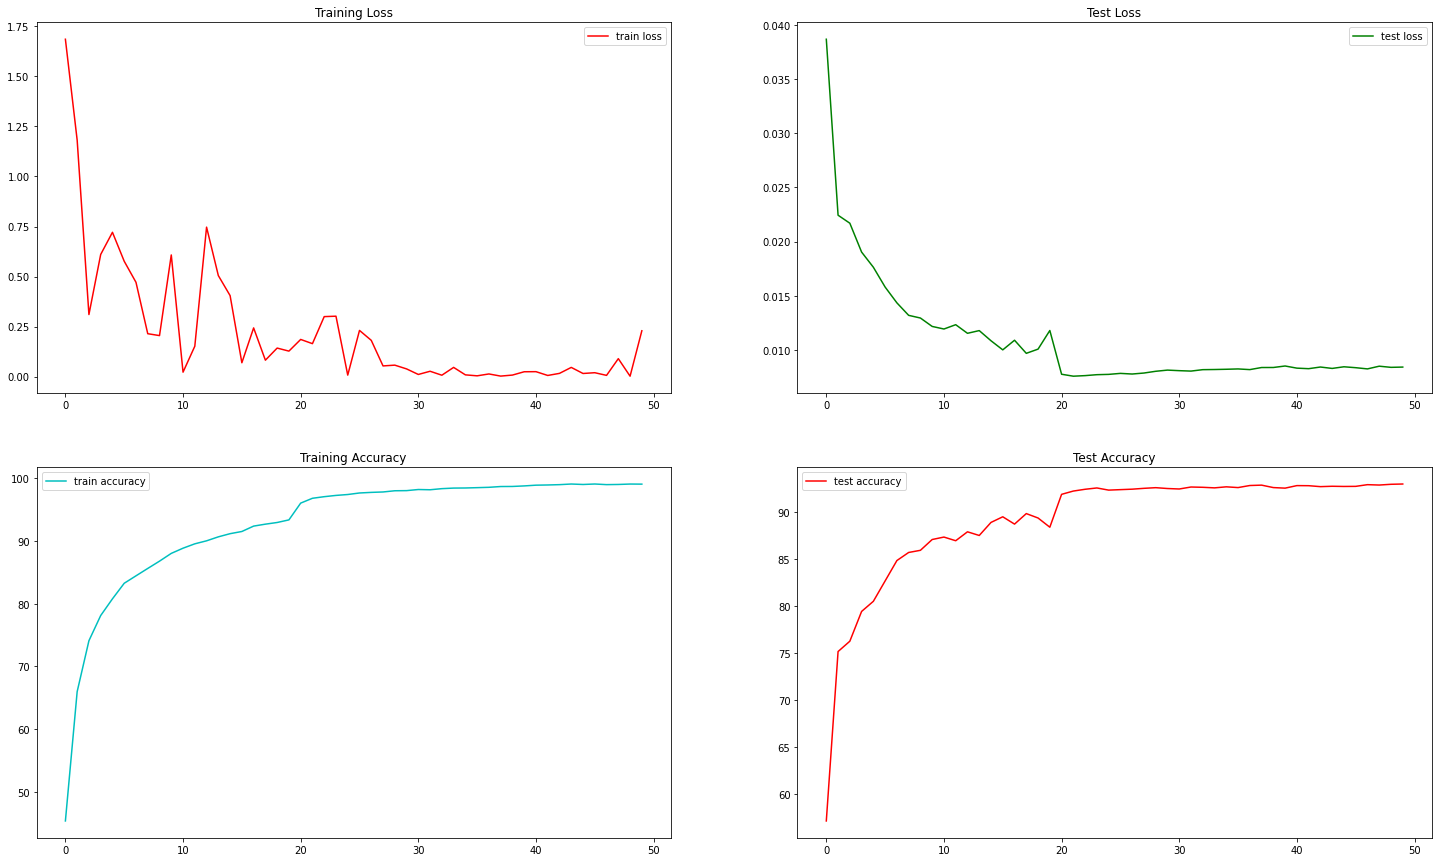

In [6]:
getPlottedGraph(EPOCHS, train_losses, train_accuracy, test_losses, test_accuracy,name="cifar_10_plot_using_resnet18_v4", PATH=IMAGE_PATH)

In [7]:
torch.save(model.state_dict(), MODEL_PATH+"model8_v4.pth")

5


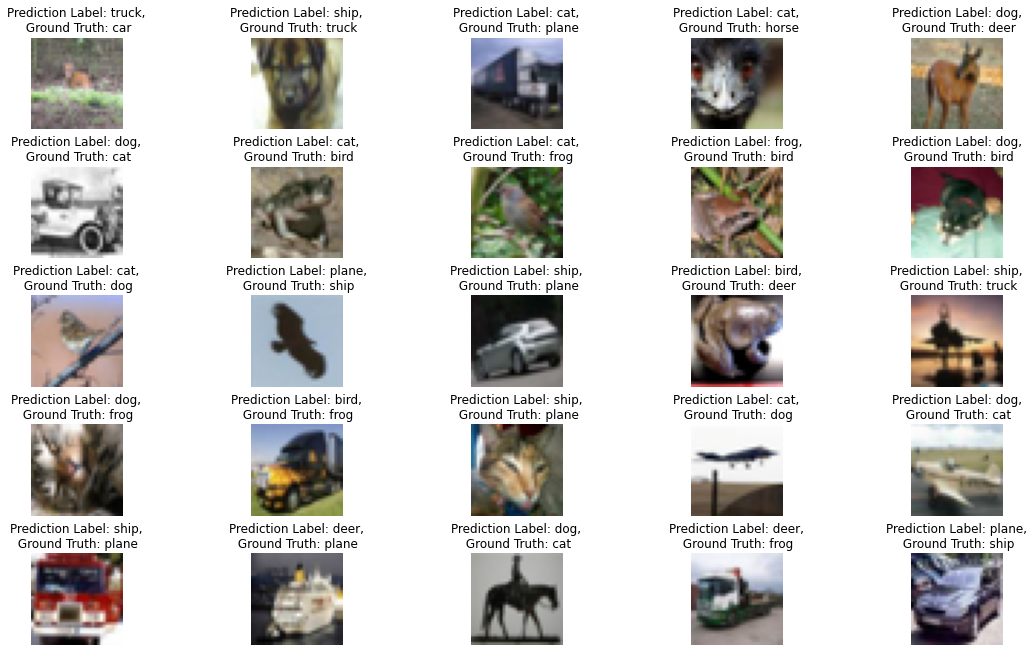

In [8]:
ms.show_save_misclassified_images(model, device, testloader, classes, list(img_mean), list(img_std), "fig_cifar10_v1", IMAGE_PATH,
                                       25)